<a href="https://colab.research.google.com/github/PCDAONE/diabetes-analysis/blob/main/diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from xgboost import XGBClassifier
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score
from sklearn.datasets import make_regression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score
import sklearn

In [50]:
dataframe = pd.read_csv("/content/processed_GE-75_data_summary_table.csv")

In [51]:
dataframe = dataframe.drop(columns=['patient ID'])

In [52]:
X = dataframe.iloc[:,1:1030]
Y = dataframe.iloc[:,0]

In [53]:
from sklearn import preprocessing

X = X.values
min_max_scaler = preprocessing.MinMaxScaler()
X = min_max_scaler.fit_transform(X)
X = pd.DataFrame(X)

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25)

In [55]:
#hyperparameter tuning

import xgboost as xgb

dmatrix = xgb.DMatrix(data=X, label=Y)
params = { 'max_depth': [3, 5, 6, 10, 15, 20, 25, 30, 35, 40],
           'learning_rate': [0.01, 0.1, 0.2, 0.3, 0.4, 0.5],
           'subsample': np.arange(0.5, 1.0, 0.1),
           'min_child_weight': [1, 5, 10],
           'gamma': [0.5, 1, 1.5, 2, 5],
           'colsample_bytree': np.arange(0.4, 1.0, 0.1),
           'colsample_bylevel': np.arange(0.4, 1.0, 0.1),
           'reg_alpha': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'reg_lambda': [0,0.1,0.2,0.4,0.8,1.6,3.2,6.4,12.8,25.6,51.2,102.4,200],
           'n_estimators': [10, 20, 30, 50, 100, 500, 1000, 1500, 2000]}
xgbr = xgb.XGBRegressor(seed = 20)
clf = RandomizedSearchCV(estimator=xgbr,
                         param_distributions=params,
                         scoring='neg_mean_squared_error',
                         n_iter=25,
                         verbose=0)
clf.fit(X, Y)


print("Best parameters:", clf.best_params_)
print("Lowest RMSE: ", (-clf.best_score_)**(1/2.0))

[19:27:11] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:14] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:17] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:20] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:23] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:28] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[19:27:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of re

In [56]:
model = XGBRegressor(subsample=0.7, reg_lambda=3.2, n_estimators=20, reg_alpha=0.2, min_child_weight=1, max_depth=35, learning_rate=0.4, gamma=0.5, colsample_bytree=0.6, colsample_bylevel=0.5)

In [57]:
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

[19:31:18] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


(1030.5, -0.5)

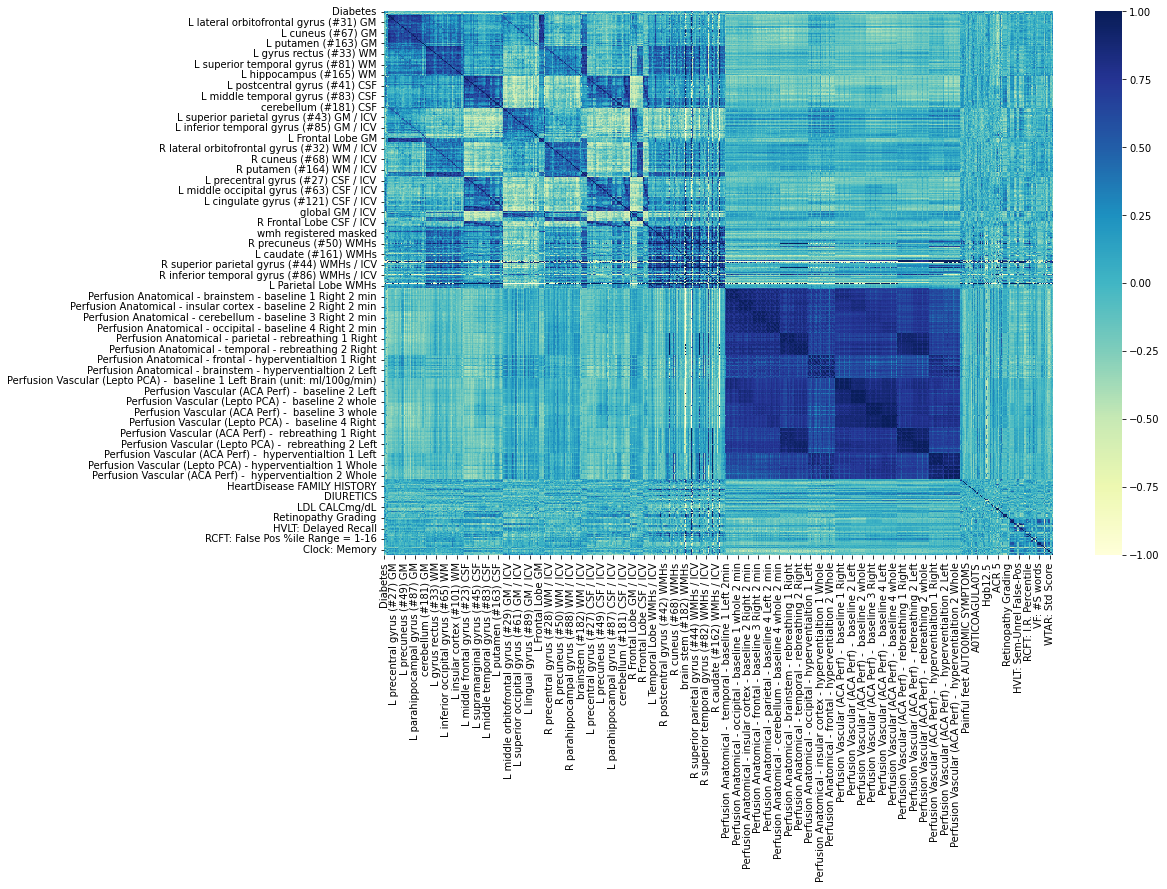

In [59]:
fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(dataframe.corr(), ax=ax, cmap='YlGnBu')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

In [60]:
corr = dataframe.corr()
abs(corr).sort_values(by = 'Diabetes', ascending = False)['Diabetes']

Diabetes                                          1.000000
DM PATIENT MEDICAL HISTORY                        0.957178
R middle orbitofrontal gyrus (#30) WMHs / ICV     0.757231
ORAL H1POGL1CEMIC                                 0.623813
L lateral orbitofrontal gyrus (#31) WMHs / ICV    0.401271
                                                    ...   
R inferior temporal gyrus (#86) WMHs / ICV             NaN
R fusiform gyrus (#92) WMHs / ICV                      NaN
R hippocampus (#166) WMHs / ICV                        NaN
brainstem (#182) WMHs / ICV                            NaN
STROKE PATIENT MEDICAL HISTORY                         NaN
Name: Diabetes, Length: 1030, dtype: float64